
1(a). minimum and maximum values before and after performing the Min-Max normalization of the attributes:

temperature :
min = 10.085
max = 31.375
new min = 3.0
new max = 9.0 

humidity :
min = 34.206
max = 99.72
new min = 3.0
new max = 9.0 

pressure :
min = 992.655
max = 1037.604
new min = 3.0
new max = 9.0 

rain :
min = 0.0
max = 2470.5
new min = 3.0
new max = 9.0 

lightavgw/o0 :
min = 0.0
max = 10565.352
new min = 3.0
new max = 9.0 

lightmax :
min = 2259.0
max = 54612.0
new min = 3.0
new max = 9.0 

moisture :
min = 0.0
max = 100.0
new min = 3.0
new max = 9.0 

1(b). mean and standard deviation of the attributes before and after the standardization:

temperature :
mean = 21.37
std = 4.125
new mean = -0.0
new std = 0.9999999999999988 

humidity :
mean = 83.992
std = 17.566
new mean = -0.0
new std = 1.0000000000000024 

pressure :
mean = 1014.761
std = 6.121
new mean = -0.0
new std = 0.9999999999999999 

rain :
mean = 168.4
std = 399.689
new mean = -0.0
new std = 1.00000000000000

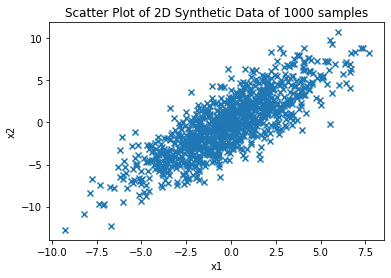


2(b).



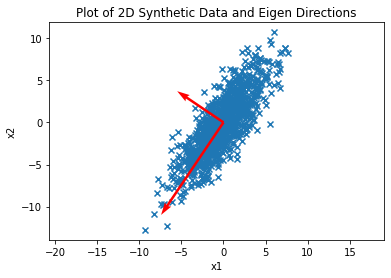


2(c).

for EigenVector 1


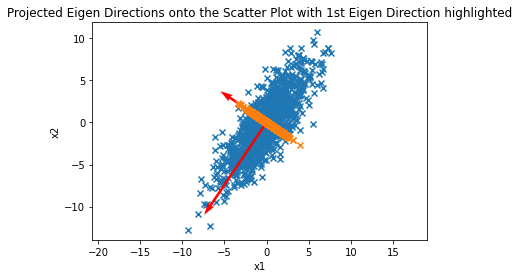

for EigenVector 2


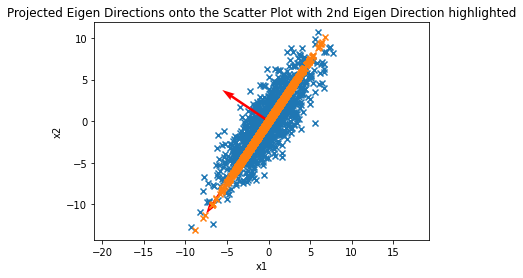


2(d).

Reconstruction error: -1.1560197243909443e-16

3(a).

Variance of the projected data along the two directions:
 [2.20229848 1.42082583]

Eigenvalues: 
 [2.2022984815502253, 1.4208258327444998]


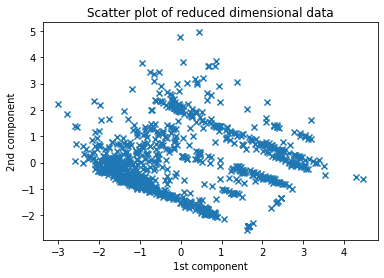


3(b).



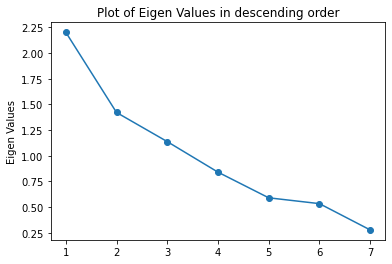


3(c).



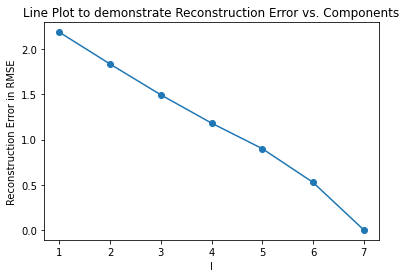

In [1]:

#____________________________________________

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('landslide_data3.csv')

data = data.drop(['stationid','dates'],axis=1)
attributes = ['temperature','humidity','pressure','rain','lightavgw/o0','lightmax','moisture']

# 1.
# This func. will replace outliers of an attribute with meadian
def outliers(attr):
    q1=data[attr].quantile(.25)# 1st quartile
    q3=data[attr].quantile(.75)# 3rd quartile
    
    data.loc[data[attr] > q3+1.5*(q3-q1), attr]= np.nan  #Replacing outliers with 'NaN'
    data.loc[data[attr] < q1-1.5*(q3-q1), attr]= np.nan
    
    median=np.nanmedian(data[attr])
    data[attr]=data[attr].fillna(median)  #Filling 'NaN' values with median
    
for i in attributes:
    outliers(i)      #calling the func. for all attributes
    
# 1(a).____________________   
data_1a=data.copy()
# This func. will perform Min-Max normalization of the attribute
def minmax(attr):
    mn=data_1a[attr].min()
    mx=data_1a[attr].max()
    print(attr,':')
    print('min =',round(mn,3))
    print('max =',round(mx,3))
    
    for i in data_1a[attr].index:
        data_1a[attr][i]=((data_1a[attr][i]-mn)/(mx-mn))*6+3   #Applying the formula
    
    new_mn=data_1a[attr].min()
    new_mx=data_1a[attr].max()
    
    print('new min =',new_mn)
    print('new max =',new_mx,'\n')
    
print('\n1(a). minimum and maximum values before and after performing the Min-Max normalization of the attributes:\n')
for i in attributes:
    minmax(i)        #calling the func. for all attributes

# 1(b).___________________
data_1b=data.copy()  
# This func. will standardize the attribute 
def standardize(attr):
    mean = data_1b[attr].mean()
    std = data_1b[attr].std()
    print(attr,':')
    print('mean =',round(mean,3))
    print('std =',round(std,3))
    
    for i in data_1b[attr].index:
        data_1b[attr][i]=(data_1b[attr][i]-mean)/std   #Applying the formula
    
    new_mean=data_1b[attr].mean()
    new_std=data_1b[attr].std()
    
    print('new mean =',round(new_mean,3))
    print('new std =',new_std,'\n')

print('1(b). mean and standard deviation of the attributes before and after the standardization:\n')
for i in attributes:
    standardize(i)     #calling the func. for all attributes


# 2(a).________________________________________
print('\n2(a).\n')
mean=[0,0]
cov_mat = [[6.84806467,7.63444163],[7.63444163,13.02074623]]  #covariance matrix
D = np.random.multivariate_normal(mean,cov_mat,1000)          #Generating 2-dimensional synthetic data of 1000 samples 

plt.scatter(D[:,0],D[:,1],marker='x')                   #plotting scatter plot
plt.title('Scatter Plot of 2D Synthetic Data of 1000 samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
# 2(b)._____________________________
print('\n2(b).\n')
eigVal,eigVec= np.linalg.eig(cov_mat)  #Computing the eigenvalues and eigenvectors of the covariance matrix

eigVec1 = eigVec[:,0]  # 1st eigenvector
eigVec2 = eigVec[:,1]  # 2nd eigenvector

plt.scatter(D[:,0],D[:,1],marker='x')
plt.axis('equal')
plt.quiver(0,0,eigVec1[0],eigVec1[1],scale=6,color='red')  #plotting eigen directions
plt.quiver(0,0,eigVec2[0],eigVec2[1],scale=3,color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of 2D Synthetic Data and Eigen Directions')
plt.show()

# 2(c).______________________________
print('\n2(c).\n')
print("for EigenVector 1")
x1=[]
y1=[]
#Projecting the data on to the first Eigen direction
for i in range(1000):
    dot=eigVec1[0]*D[i][0]+eigVec1[1]*D[i][1]
    x1.append(dot*eigVec1[0])
    y1.append(dot*eigVec1[1])
    
plt.scatter(D[:,0],D[:,1],marker='x')
plt.axis('equal')
plt.quiver(0,0,eigVec1[0],eigVec1[1],scale=6,color='red')
plt.quiver(0,0,eigVec2[0],eigVec2[1],scale=3,color='red')
plt.scatter(x1,y1,marker='x')   #scatter plot superimposed on 1st Eigen vector
plt.title('Projected Eigen Directions onto the Scatter Plot with 1st Eigen Direction highlighted')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print("for EigenVector 2")
x2=[]
y2=[]
#Projecting the data on to the second Eigen direction
for i in range(1000):
    dot=eigVec2[0]*D[i][0]+eigVec2[1]*D[i][1]
    x2.append(dot*eigVec2[0])
    y2.append(dot*eigVec2[1])
    
plt.scatter(D[:,0],D[:,1],marker='x')
plt.axis('equal')
plt.quiver(0,0,eigVec1[0],eigVec1[1],scale=6,color='red')
plt.quiver(0,0,eigVec2[0],eigVec2[1],scale=3,color='red')
plt.scatter(x2,y2,marker='x')    #scatter plot superimposed on 2nd Eigen vector
plt.title('Projected Eigen Directions onto the Scatter Plot with 2nd Eigen Direction highlighted')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 2(d)._________________________
print('\n2(d).\n')
for i in range(1000):
    x2[i] += x1[i];
    y2[i] += y1[i];
RMSE = 0;
for i in range(1000):
    error = (D[i][0]-x2[i])*2 + (D[i][1]-y2[i])*2;
    RMSE += error;
RMSE/=1000
print('Reconstruction error:',RMSE)


# 3(a)._____________________________________________________________
print('\n3(a).\n')
org_data= data_1b.copy()  # outlier corrected standardized data

from sklearn.decomposition import PCA
from scipy.linalg import eigh

cov_matrix = np.dot(data_1b.T,data_1b)

pca = PCA(n_components = 2)
data_3= pca.fit_transform(data_1b)
Df = pd.DataFrame(data =data_3, columns=('c1','c2'))

print('Variance of the projected data along the two directions:\n',pca.explained_variance_)

cov_matrix/=944
eig_val,eig_vec = eigh(cov_matrix,eigvals=(5,6))
eig_val= list(eig_val)
eig_val.reverse();
print("\nEigenvalues: \n",eig_val);

plt.scatter(Df['c1'],Df['c2'],marker='x')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Scatter plot of reduced dimensional data')
plt.show()

# 3(b).__________________________________
print('\n3(b).\n')
eig_val,eig_vec = eigh(cov_matrix,eigvals=(0,6))
eig_val= list(eig_val)
eig_val.reverse();

plt.plot([1,2,3,4,5,6,7],eig_val,marker='o')
plt.ylabel('Eigen Values')
plt.title('Plot of Eigen Values in descending order')
plt.show()

# 3(c).___________________________________
print('\n3(c).\n')
df=pd.DataFrame(data =org_data ,columns = ['temperature','humidity','pressure','rain','lightavgw/o0','lightmax','moisture'])

xx=[]
yy=[]
for i in range(1,8):
    val=0
    pca = PCA(n_components=i)
    prinComp  =pca.fit_transform(df)
    reconst = pca.inverse_transform(prinComp)
     
    new_df =pd.DataFrame(data=reconst,columns = ['temperature','humidity','pressure','rain','lightavgw/o0','lightmax','moisture'])
    for j in attributes:        
        for k in df[j].index:            
            val += (df[j][k]-new_df[j][k])**2
    xx.append(i)
    yy.append((val/df.shape[0])**0.5)

plt.plot(xx,yy,marker='o')
plt.xlabel('l')
plt.ylabel('Reconstruction Error in RMSE')
plt.title('Line Plot to demonstrate Reconstruction Error vs. Components')
plt.show()

       











